In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [12]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [13]:
img_width = 180
img_height =180 

In [15]:
import os
print(os.path.abspath(data_train_path))
print(os.path.exists(data_train_path))


C:\Users\Sushobhit\Fruits_Vegetables\train
False


In [17]:
data_train_path = r"C:\Python\Image Classification\Fruits_Vegetables\train"


In [18]:
data_test_path = r"C:\Python\Image Classification\Fruits_Vegetables\test"


In [19]:
data_validatio_path = r"C:\Python\Image Classification\Fruits_Vegetables\validation"


In [20]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [21]:
data_cat = data_train.class_names

In [22]:
data_cat


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [25]:
import os
print("Path:", os.path.abspath(data_val_path))
print("Exists:", os.path.exists(data_val_path))


Path: C:\Users\Sushobhit\Fruits_Vegetables\validation
Exists: False


In [27]:
data_val_path = r"C:\Python\Image Classification\Fruits_Vegetables\validation"

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False
)


Found 351 files belonging to 36 classes.


In [28]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


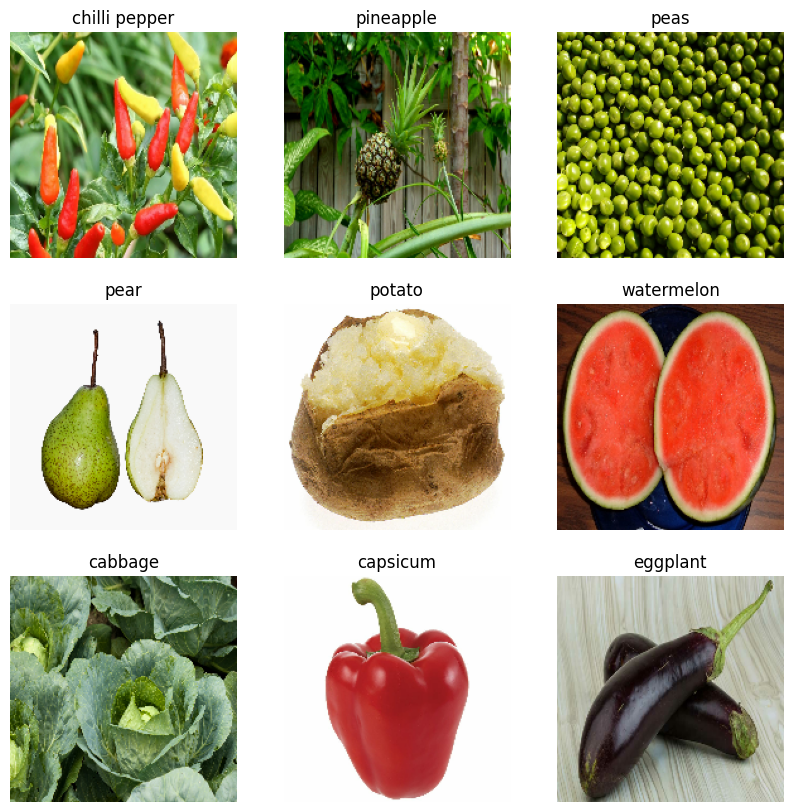

In [29]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [33]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 268ms/step - accuracy: 0.0787 - loss: 3.4484 - val_accuracy: 0.1880 - val_loss: 2.9210
Epoch 2/25
 6/98 ━━━━━━━━━━━━━━━━━━━━ 23s 254ms/step - accuracy: 0.1549 - loss: 3.1026